# Téléchargement de la structure de bandes électroniques

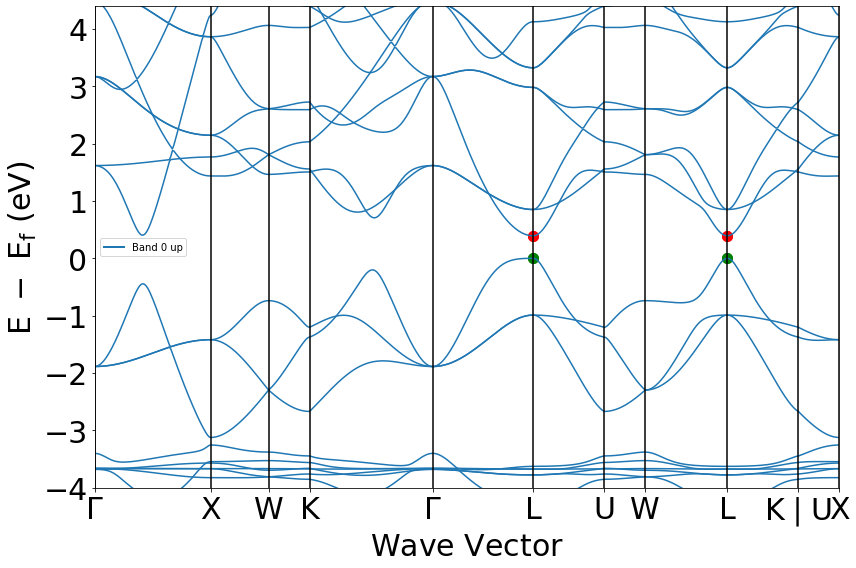

In [4]:
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.electronic_structure.bandstructure import BandStructureSymmLine
from pymatgen.electronic_structure.core import Spin
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib.image as img

with MPRester("AchX5nmEpJI03g7B") as m:
    
    #Téléchargement de la structure de bandes
    bandstruct = m.get_bandstructure_by_material_id("mp-867193") 
    bsplot = BSPlotter(bandstruct)
    bsplot.get_plot(vbm_cbm_marker=True)


# Détermination de la bande interdite

In [5]:
#BANDE INTERDITE

band_int = bandstruct.get_band_gap()
#print(band_int)
print("Energie de la bande interdite :", band_int["energy"], "eV","(donc la bande interdite se trouve entre 0 eV et",band_int["energy"], "eV)")
print("La bande interdite est", "directe" if  band_int["direct"] else "indirecte" )
print("Chemin de transition :", band_int['transition']) 

Energie de la bande interdite : 0.39139999999999997 eV (donc la bande interdite se trouve entre 0 eV et 0.39139999999999997 eV)
La bande interdite est directe
Chemin de transition : L-L


Nous avons bien une bande interdite directe car sur le graphe représentant les structures de bande, nous voyons qu les extremums des bandes de valence représentés par les points verts et ceux des bandes de conduction en rouge correspondent au même quasi-moment.

# Direction dans laquelle la dernière bande de valence/première bande de conduction présente le plus et le moins de dispersion  

In [12]:
#Direction dans laquelle la dernière bande de valence/première bande de conduction présente le plus et le moins de dispersion 

data = bsplot.bs_plot_data()

distances = data.get('distances') 
energy = data.get('energy') 
dist = data.get('ticks').get('distance')

#Calcul de la pente
def pente(a,b):
    pente = (abs(a[-1] - a[0])) /(b[-1] - b[0])
    sol = [a[-1],a[0],b[-1],b[0],pente]
    return np.array(sol)

#Dispertion
def disp1(num):
    d = len(distances)
    pente_int = np.zeros((d,5))
    for i in range(d): # Calcul des pentes liées aux vecteurs k
        pente_int[i] = pente(energy['1'][i][num], distances[i])
    return(pente_int)

def disp2(pente_int):
    d = len(distances)
    inter = np.zeros(d)
    for i in range(d):
        inter[i] = pente_int[i][4]
    return(inter)
    

In [20]:
#DERNIERE BANDE DE VALENCE

vbm_band_index = bandstruct.get_vbm()['band_index'][Spin.up][0]
print("Indice de la dernière bande de valence : ", vbm_band_index)
print( "Il s\'agit de la bande de valence contenant l\'énergie maximale")


bval_max = np.argmax(disp2(disp1(vbm_band_index)))
bval_min = np.argmin(disp2(disp1(vbm_band_index)))
print(bval_max)
print(bval_min)

pente_bval_max = disp1(vbm_band_index)[bval_max]
pente_bval_min = disp1(vbm_band_index)[bval_min]
print(pente_bval_max)
print(pente_bval_min)


Indice de la dernière bande de valence :  17
Il s'agit de la bande de valence contenant l'énergie maximale
4
0
[ 0.         -1.8871      2.96097221  2.28263489  2.78194927]
[-1.4195     -1.8871      0.78327646  0.          0.59697951]


In [21]:
#PREMIERE BANDE DE CONDUCTION

cbm_band_index = bandstruct.get_cbm()['band_index'][Spin.up][0]
print("Indice de la première bande de conduction : ", cbm_band_index)
print("Il s\'agit de la bande de contenant contenant l\'énergie minimale")

bcond_max = np.argmax(disp2(disp1(cbm_band_index)))
bcond_min = np.argmin(disp2(disp1(cbm_band_index)))


pente_bcond_max = disp1(cbm_band_index)[bcond_max]
pente_bcond_min = disp1(cbm_band_index)[bcond_min]


Indice de la première bande de conduction :  18
Il s'agit de la bande de contenant contenant l'énergie minimale


[0.59697951 1.73782829 1.67659668 0.82319224 2.78194927 2.50845961
 1.67659668 1.33409141 2.50845961 0.78106367]


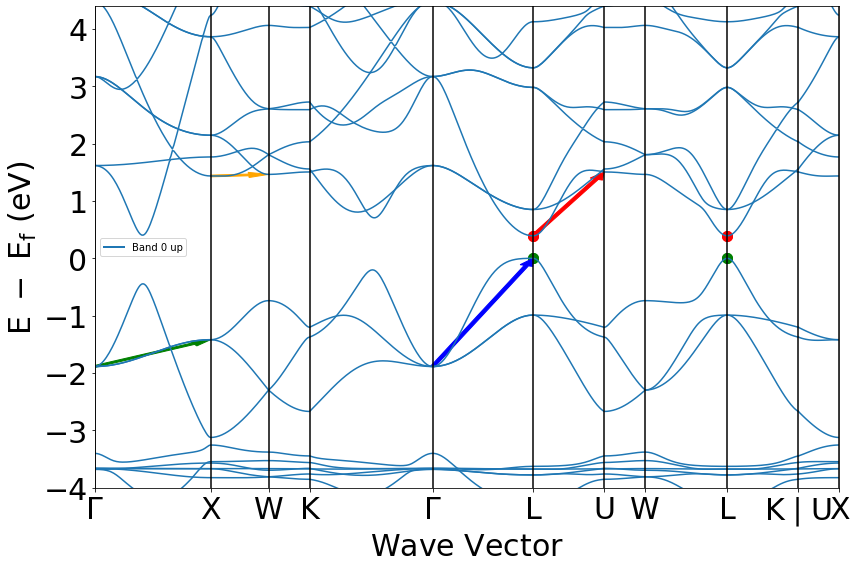

La flèche bleue indique la pente maximale pour la bande de valence et celle-ci est égale à  2.7819492709604834

La flèche verte indique la pente minimale pour la bande de valence et celle-ci est égale à  0.5969795109677785

La flèche rouge indique la pente maximale pour la bande de conduction et celle-ci est égale à  2.321033980117346

La flèche orange indique la pente minimale pour la bande de conduction et celle-ci est égale à  0.07072853915229949


In [23]:
# AFFICHAGE DU GRAPHE 

bsplot.get_plot(vbm_cbm_marker=True)
print(disp2(disp1(vbm_band_index)))

plt.arrow(pente_bval_max[3],pente_bval_max[1],pente_bval_max[2]-pente_bval_max[3],pente_bval_max[0]-pente_bval_max[1],color='blue', width = 0.03,length_includes_head = True)
plt.arrow(pente_bval_min[3],pente_bval_min[1],pente_bval_min[2]-pente_bval_min[3],pente_bval_min[0]-pente_bval_min[1],color='green', width = 0.03,length_includes_head = True)
plt.arrow(pente_bcond_max[3],pente_bcond_max[1],pente_bcond_max[2]-pente_bcond_max[3],pente_bcond_max[0]-pente_bcond_max[1],color = 'red',width =0.03, length_includes_head = True)
plt.arrow(pente_bcond_min[3],pente_bcond_min[1],pente_bcond_min[2]-pente_bcond_min[3],pente_bcond_min[0]-pente_bcond_min[1],color = 'orange',width =0.03, length_includes_head = True)

plt.show()

print("La flèche bleue indique la pente maximale pour la bande de valence et celle-ci est égale à ", pente_bval_max[4])
print("")
print("La flèche verte indique la pente minimale pour la bande de valence et celle-ci est égale à ", pente_bval_min[4])
print("")
print("La flèche rouge indique la pente maximale pour la bande de conduction et celle-ci est égale à ", pente_bcond_max[4])
print("")
print("La flèche orange indique la pente minimale pour la bande de conduction et celle-ci est égale à ", pente_bcond_min[4])


A la vue de ce graphe, nous pouvons observer que pour la dernière bande de valence, la direction Γ-L est celle avec le plus de dispertion et la direction Γ-X est celle en présentant le moins.

A la vue de ce graphe, nous pouvons observer que pour la première bande de conduction, la direction L-U est celle avec le plus de dispertion et la direction X-W est celle en présentant le moins.

# Calcul de la masse effective au sommet (base) de la dernière (première) bande de valence (conduction) en supposant une dispersion parabolique

Pour le calcul de la masse effective, nous allons supposer une dispersion parabolique et nous pouvons utiliser la formule ci-dessous pour la déterminer :

$m^* = \hbar^2 \left(\frac{d^2E}{dk^2}\right)^{-1}$



In [25]:
#CALCUL DE LA MASSE EFFECTIVE 

#1) AU SOMMET DE LA DERNIERE BANDE DE VALENCE 

vbm = bandstruct.get_vbm()
E_vbm = vbm['energy']
kp_vbm = vbm["kpoint"].cart_coords
kp_bval = vbm.get("kpoint").frac_coords
normk_bval = np.linalg.norm(kp_bval)

me_vbm = ((6.5821e-16**2 * (kp_vbm[2]**2 + kp_vbm[1]**2 + kp_vbm[0]**2)) / (2*abs(E_vbm))) #6.5821e-16=valeur de la cst de Planck
print("Au sommet de la dernière bande de valence, la masse effective vaut ",me_vbm, "kg")
print("")

#2) A LA BASE DE LA PREMIERE BANDE DE CONDUCTION

cbm = bandstruct.get_cbm()
E_cbm = cbm['energy']
kp_cbm = cbm["kpoint"].cart_coords
kp_bcon = cbm.get("kpoint").frac_coords
normk_bcon = np.linalg.norm(kp_bcon)

me_cbm = ((6.5821e-16**2 * (kp_cbm[2]**2 + kp_cbm[1]**2 + kp_cbm[0]**2)) / (2*(E_cbm))) 
print("A la base de la première bande de conduction, la masse effective vaut ",me_cbm, "kg")


Au sommet de la dernière bande de valence, la masse effective vaut  2.739930938555474e-32 kg

A la base de la première bande de conduction, la masse effective vaut  2.473778264554876e-32 kg
